In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [2]:
ceix=yf.download('CEIX', period= 'max')

[*********************100%%**********************]  1 of 1 completed


In [3]:
ceix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-14,22.500000,22.500000,22.250000,22.250000,20.745716,900
2017-11-15,25.000000,25.000000,25.000000,25.000000,23.309793,100
2017-11-16,25.299999,25.299999,21.879999,21.879999,20.400730,1400
2017-11-17,21.879999,21.879999,21.879999,21.879999,20.400730,0
2017-11-20,21.879999,21.879999,21.879999,21.879999,20.400730,0


In [4]:
ceix.shape

(1540, 6)

In [5]:
ceix.index

DatetimeIndex(['2017-11-14', '2017-11-15', '2017-11-16', '2017-11-17',
               '2017-11-20', '2017-11-21', '2017-11-22', '2017-11-24',
               '2017-11-27', '2017-11-28',
               ...
               '2023-12-14', '2023-12-15', '2023-12-18', '2023-12-19',
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-26',
               '2023-12-27', '2023-12-28'],
              dtype='datetime64[ns]', name='Date', length=1540, freq=None)

<Axes: xlabel='Date'>

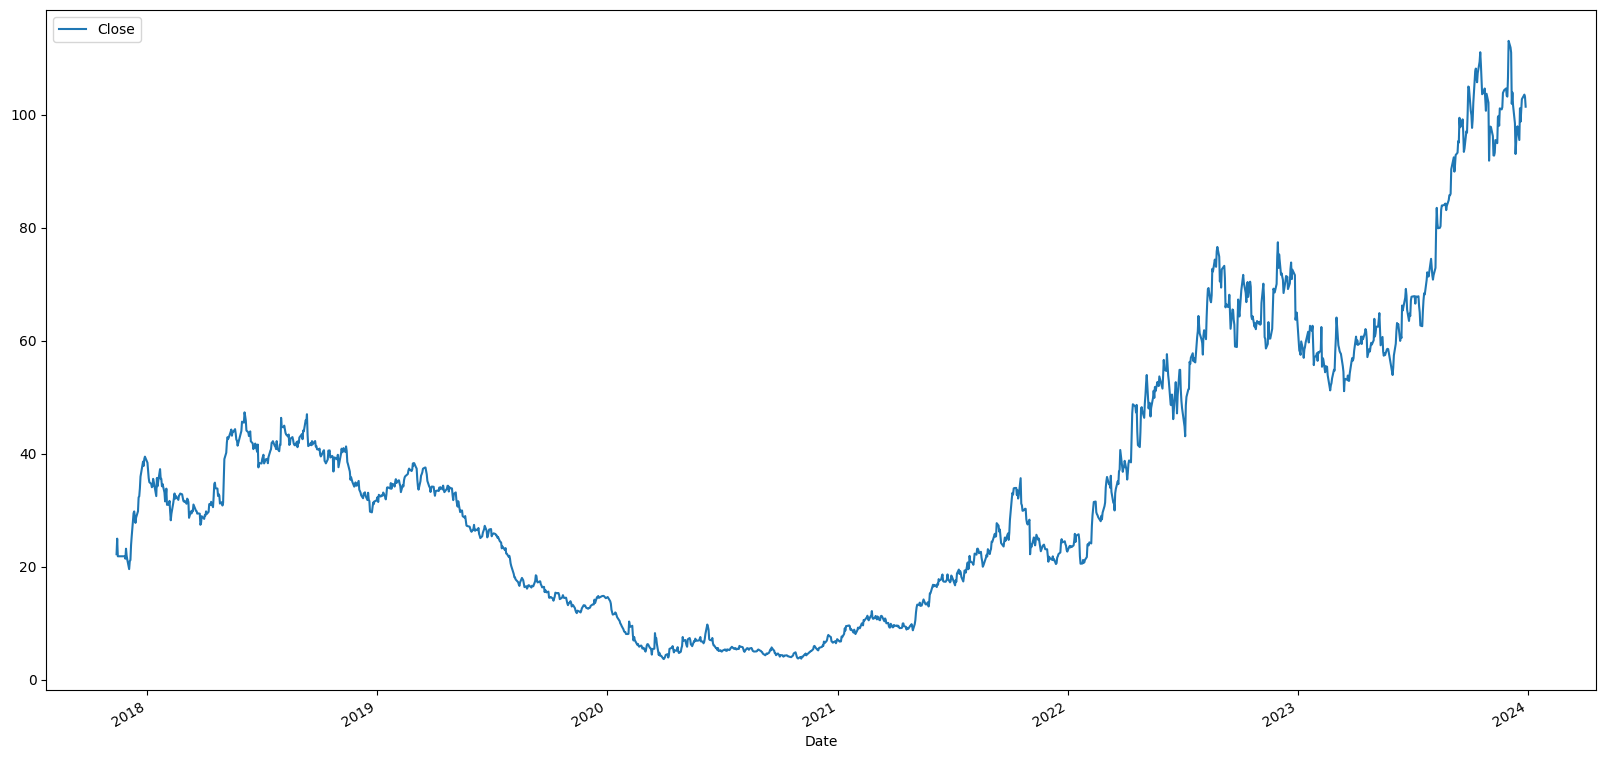

In [6]:
ceix.plot.line(y='Close', figsize=(20,10),use_index=True)

In [7]:
ceix['Tomorrow']=ceix['Open'].shift(-1)

In [8]:
ceix

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
2017-11-14,22.500000,22.500000,22.250000,22.250000,20.745716,900,25.000000
2017-11-15,25.000000,25.000000,25.000000,25.000000,23.309793,100,25.299999
2017-11-16,25.299999,25.299999,21.879999,21.879999,20.400730,1400,21.879999
2017-11-17,21.879999,21.879999,21.879999,21.879999,20.400730,0,21.879999
2017-11-20,21.879999,21.879999,21.879999,21.879999,20.400730,0,21.879999
...,...,...,...,...,...,...,...
2023-12-21,99.849998,101.820000,99.750000,100.739998,100.739998,365300,101.720001
2023-12-22,101.720001,104.089996,101.129997,102.769997,102.769997,302700,104.019997
2023-12-26,104.019997,104.577003,102.750000,103.580002,103.580002,267600,103.580002


In [9]:
ceix['Target']=(ceix['Tomorrow'] > ceix['Close']).astype(int)

In [10]:
ceix

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2017-11-14,22.500000,22.500000,22.250000,22.250000,20.745716,900,25.000000,1
2017-11-15,25.000000,25.000000,25.000000,25.000000,23.309793,100,25.299999,1
2017-11-16,25.299999,25.299999,21.879999,21.879999,20.400730,1400,21.879999,0
2017-11-17,21.879999,21.879999,21.879999,21.879999,20.400730,0,21.879999,0
2017-11-20,21.879999,21.879999,21.879999,21.879999,20.400730,0,21.879999,0
...,...,...,...,...,...,...,...,...
2023-12-21,99.849998,101.820000,99.750000,100.739998,100.739998,365300,101.720001,1
2023-12-22,101.720001,104.089996,101.129997,102.769997,102.769997,302700,104.019997,1
2023-12-26,104.019997,104.577003,102.750000,103.580002,103.580002,267600,103.580002,0


In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state =1)

In [12]:
train= ceix.iloc[:-540]
test= ceix.iloc[-540:]

In [13]:
predictors=['Close','Volume','Open','High','Low']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
from sklearn.metrics import precision_score
preds=model.predict(test[predictors])

In [15]:
preds=pd.Series(preds,index=test.index)
preds

Date
2021-11-04    1
2021-11-05    0
2021-11-08    1
2021-11-09    0
2021-11-10    0
             ..
2023-12-21    1
2023-12-22    1
2023-12-26    1
2023-12-27    1
2023-12-28    1
Length: 540, dtype: int32

In [16]:
precision_score(test['Target'],preds)

0.52465483234714

In [17]:
combined=pd.concat([test['Target'],preds],axis=1)

<Axes: xlabel='Date'>

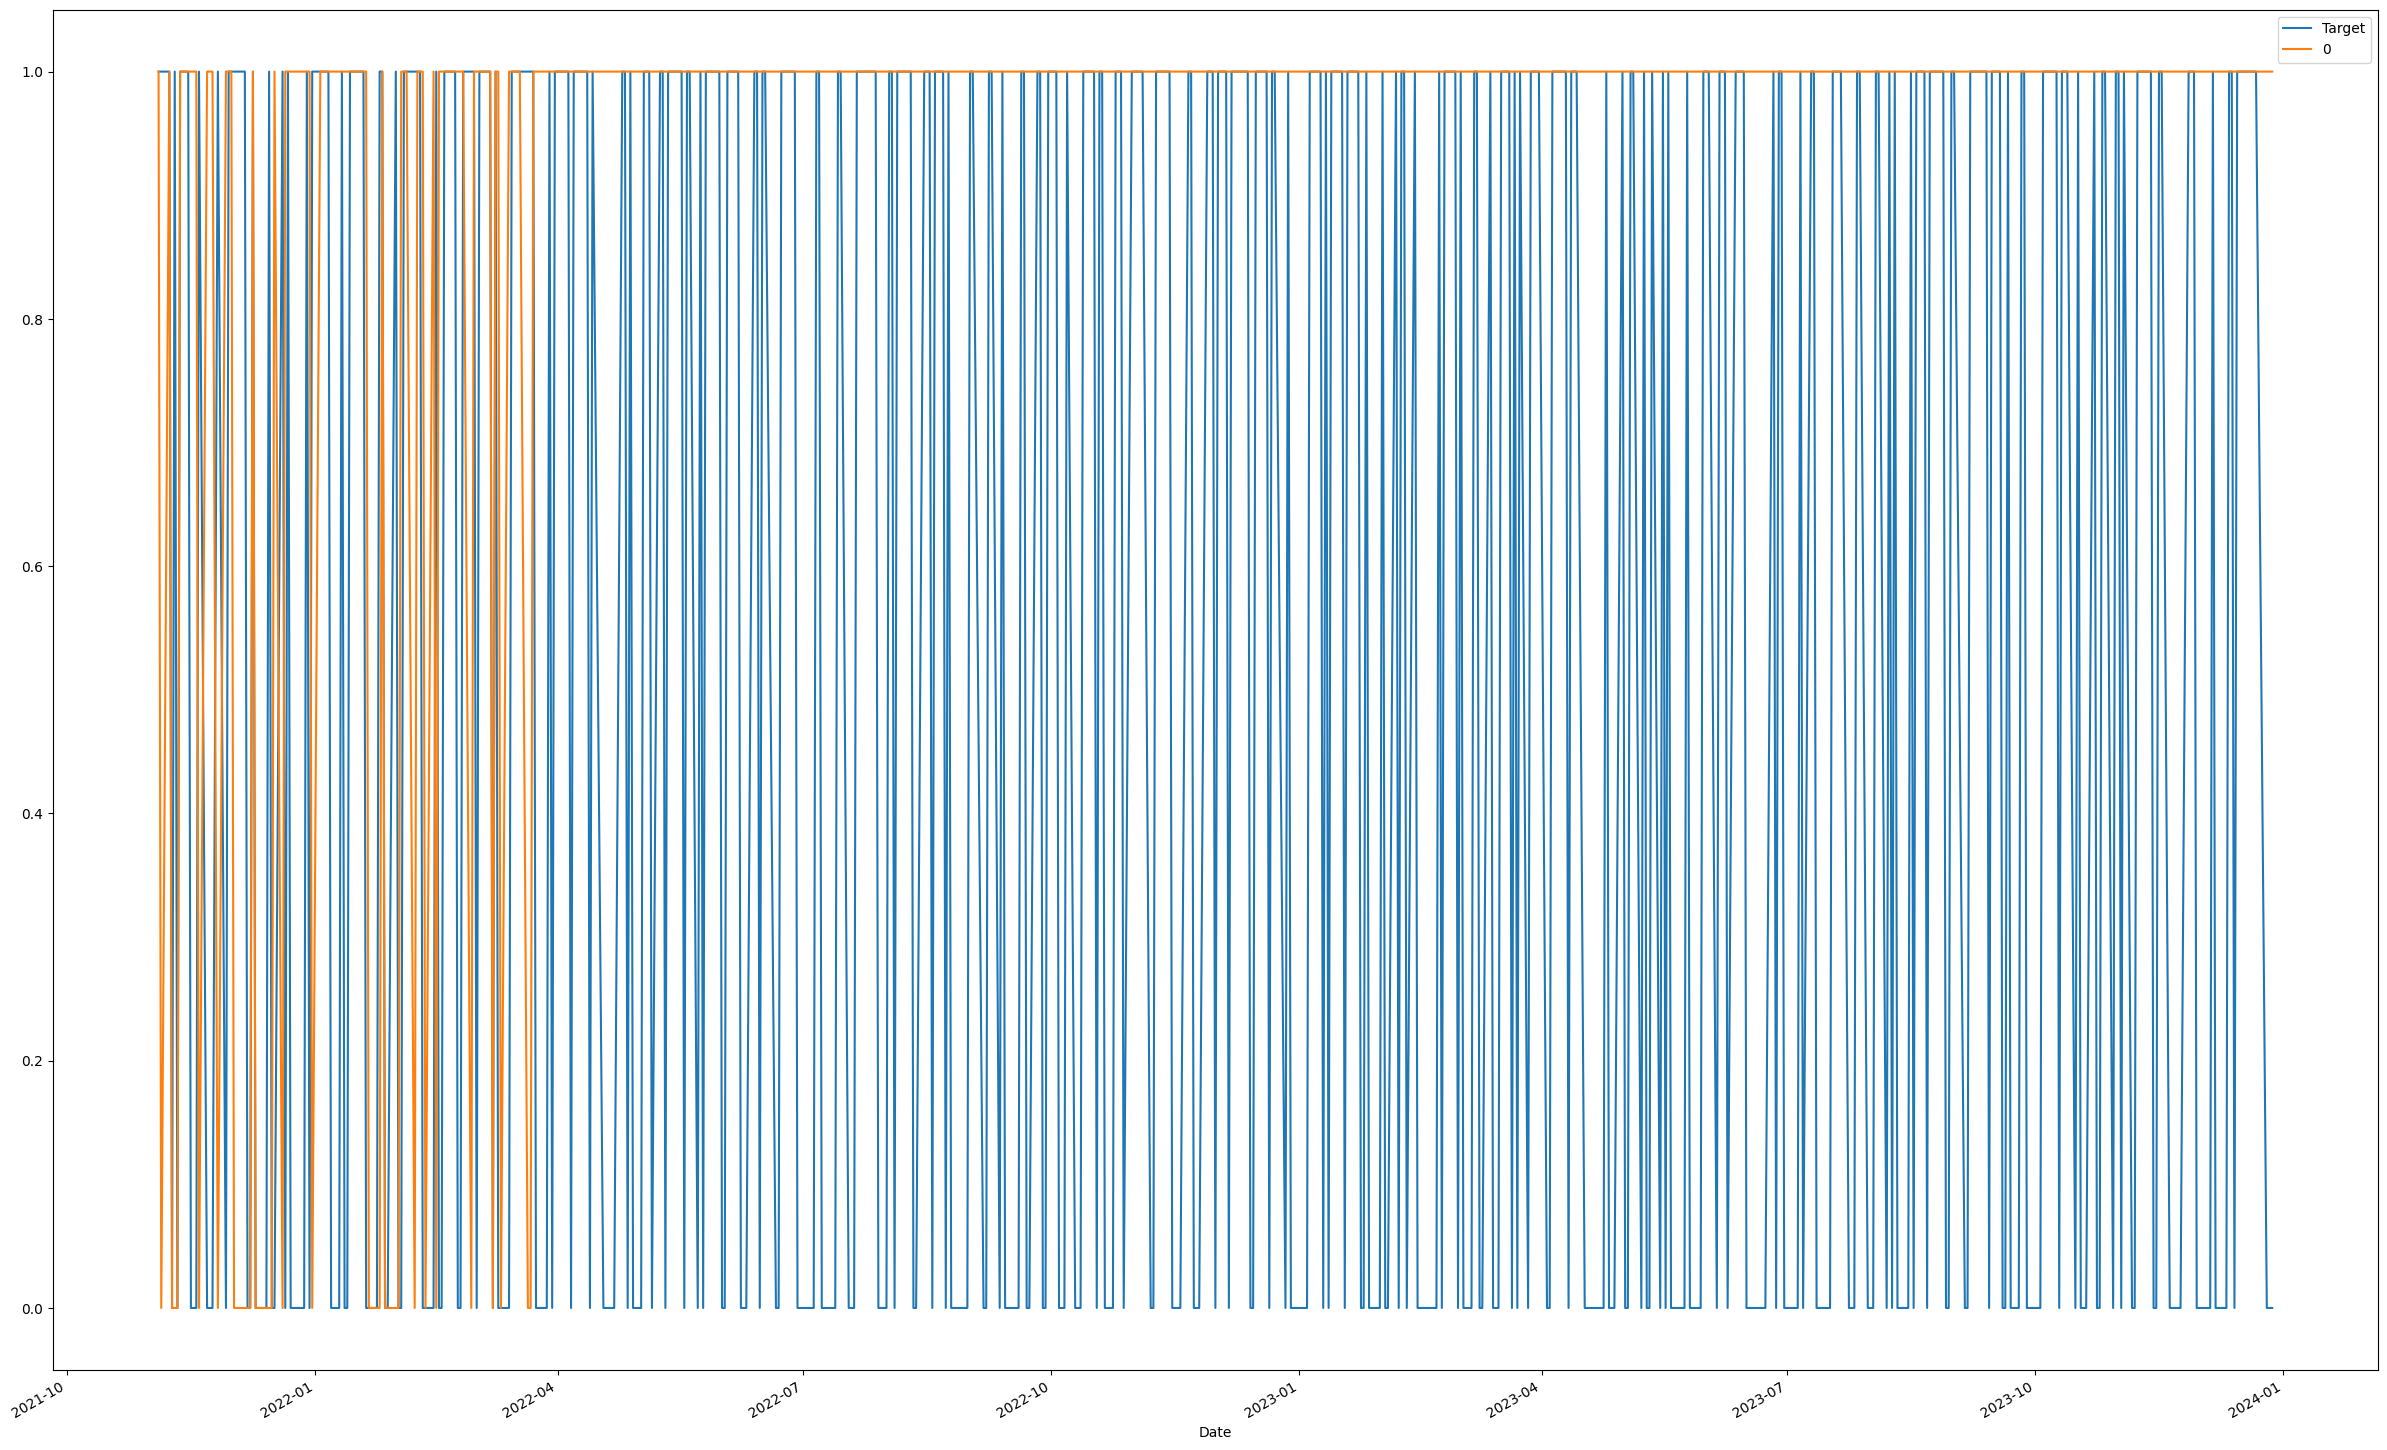

In [18]:
combined.plot(figsize=(30,20))

In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds, index=test.index, name='Predictions')
    combined=pd.concat([test['Target'], preds],axis=1)
    return combined

In [20]:
def backtest(data,model, predictors, start=100, step= 40):
        all_predictions=[]
        
        for i in range(start, data.shape[0], step):
            train=data.iloc[0:i].copy()
            test=data.iloc[i:(i+step)].copy()
            predictions=predict(train, test, predictors, model)
            all_predictions.append(predictions)
        return pd.concat(all_predictions)

In [21]:
predictions=backtest(ceix, model, predictors)

In [22]:
predictions['Predictions'].value_counts()

1    782
0    658
Name: Predictions, dtype: int64

In [23]:
ceix['Target'].value_counts()

1    805
0    735
Name: Target, dtype: int64

In [24]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5127877237851662

In [25]:
predictions['Target'].value_counts()/predictions.shape[0]

1    0.522917
0    0.477083
Name: Target, dtype: float64

In [32]:
horizons=[2,5,50,150,250]
new_predictors=[]

for horizon in horizons:
    rolling_averages=ceix.rolling(horizon).mean()
    
    ratio_column=f"Close_Ratio_{horizon}"
    ceix[ratio_column]=ceix['Close'] / rolling_averages['Close']
    
    trend_column=f"Trend_{horizon}"
    ceix[trend_column]=ceix.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]

In [33]:
ceix

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_50,Trend_50,Close_Ratio_150,Trend_150,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,,,,
2018-11-12,41.180000,41.230000,39.630001,40.320000,37.594036,251000,40.029999,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-13,40.029999,41.950001,40.029999,41.320000,38.526424,327200,41.980000,1,1.012249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-14,41.980000,41.980000,39.740002,40.540001,37.799164,226600,40.180000,0,0.990472,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-15,40.180000,40.680000,38.380001,38.580002,35.971676,512600,38.650002,1,0.975228,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-16,38.650002,38.950001,37.259998,38.209999,35.626686,435500,38.240002,1,0.995182,1.0,0.960195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,101.669998,103.400002,98.470001,98.800003,98.800003,541600,99.849998,1,0.988198,2.0,1.006253,4.0,0.973261,25.0,1.159149,76.0,1.323583,123.0
2023-12-21,99.849998,101.820000,99.750000,100.739998,100.739998,365300,101.720001,1,1.009722,2.0,1.019182,4.0,0.993505,26.0,1.177952,77.0,1.347420,124.0
2023-12-22,101.720001,104.089996,101.129997,102.769997,102.769997,302700,104.019997,1,1.009975,2.0,1.029718,5.0,1.014125,26.0,1.197461,77.0,1.372356,124.0


In [34]:
ceix.dropna(inplace=True)

In [35]:
ceix


,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_50,Trend_50,Close_Ratio_150,Trend_150,Close_Ratio_250,Trend_250
Date,,,,,,,,,,,,,,,,,,
2019-11-11,13.050000,13.095000,12.530000,12.710000,11.850698,447900,12.690000,0,0.979199,0.0,0.964926,1.0,0.832264,23.0,0.571952,72.0,0.467969,127.0
2019-11-12,12.690000,12.790000,12.200000,12.260000,11.431123,731500,12.150000,0,0.981978,0.0,0.950535,1.0,0.807121,23.0,0.555332,71.0,0.453341,127.0
2019-11-13,12.150000,12.290000,11.735000,12.000000,11.188700,388700,11.970000,0,0.989283,0.0,0.944882,1.0,0.794892,22.0,0.547146,70.0,0.445608,126.0
2019-11-14,11.970000,12.170000,11.800000,11.820000,11.020870,480800,12.110000,1,0.992443,0.0,0.952611,0.0,0.787958,21.0,0.542613,69.0,0.440675,126.0
2019-11-15,12.110000,12.740000,11.920000,12.260000,11.431123,711600,12.200000,0,1.018272,1.0,1.004095,1.0,0.822024,21.0,0.566533,70.0,0.458855,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20,101.669998,103.400002,98.470001,98.800003,98.800003,541600,99.849998,1,0.988198,2.0,1.006253,4.0,0.973261,25.0,1.159149,76.0,1.323583,123.0
2023-12-21,99.849998,101.820000,99.750000,100.739998,100.739998,365300,101.720001,1,1.009722,2.0,1.019182,4.0,0.993505,26.0,1.177952,77.0,1.347420,124.0
2023-12-22,101.720001,104.089996,101.129997,102.769997,102.769997,302700,104.019997,1,1.009975,2.0,1.029718,5.0,1.014125,26.0,1.197461,77.0,1.372356,124.0


In [36]:
model=RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [39]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds=model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6]=1
    preds[preds<.6]=0
    preds=pd.Series(preds, index=test.index, name='Predictions')
    combined=pd.concat([test['Target'], preds],axis=1)
    return combined

In [40]:
predictions=backtest(ceix, model, new_predictors)

In [41]:
predictions['Predictions'].value_counts()

0.0    651
1.0    288
Name: Predictions, dtype: int64

In [42]:
precision_score(predictions['Target'], predictions['Predictions'])

0.53125

In [43]:
predictions['Target'].value_counts()/predictions.shape[0]

1    0.532481
0    0.467519
Name: Target, dtype: float64